# Estatística com Python: testes de hipóteses

## Teste de normalidade e as etapas de um teste 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('/home/franciscofoz/Documents/GitHub/math-stats-training/Estatística/Datasets/dados_curso_estatistica_2.csv')
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [3]:
from scipy.stats import normaltest

In [4]:
significancia = 0.05

### Renda é normal??

<Axes: >

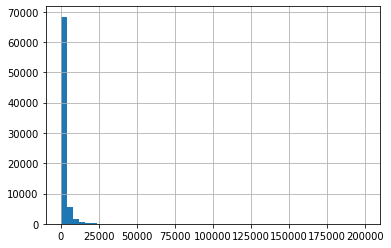

In [5]:
df.Renda.hist(bins=50)

In [6]:
# H0 = Amostra proviniente de uma normal
## Critério do valor p = Rejeitar H0 se o valor p <= 0.05

normaltest(df.Renda)

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

### Altura é normal??

<Axes: >

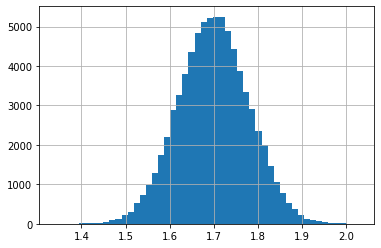

In [7]:
df.Altura.hist(bins=50)

In [8]:
# H0 = Amostra proviniente de uma normal
## Critério do valor p = Rejeitar H0 se o valor p <= 0.05

normaltest(df.Altura)

NormaltestResult(statistic=0.19973093957002253, pvalue=0.9049591541967501)

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='red'>Pontos importantes</font>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

## Teste bicaudal e entendendo o p-valor

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

#### Exercício 1 

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

$H_0: \mu = 500$

$H_1: \mu \neq 500$

In [9]:
media_amostral = 503.24
std_amostral = 4.48

media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50


In [10]:
from scipy.stats import norm

prob = (0.5 + (confianca / 2))
prob

0.975

In [11]:
z_alpha_2 = norm.ppf(prob)
z_alpha_2

1.959963984540054

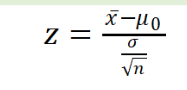

In [12]:
import numpy as np

z = (media_amostral - media) / (std_amostral/ np.sqrt(n))
z

5.113897256795581

Rejeita-se $H_0$ porque z é <= que $\frac{z alpha}{2}$

#### p-valor

In [13]:
import numpy as np
from scipy.stats import norm

media_amostral = 503.24
std_amostral = 4.48

media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

prob = (0.5 + (confianca / 2))

z_alpha_2 = norm.ppf(prob)

z = (media_amostral - media) / (std_amostral/ np.sqrt(n))


In [16]:
z_alpha_2

1.959963984540054

In [16]:
p_valor = 2 * norm.sf(z)
p_valor

3.155790498099373e-07

In [17]:
p_valor <= significancia

True

In [35]:
from statsmodels.stats.weightstats import ztest

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [49]:
serie_numeros_gerados = np.random.normal(loc=media_amostral, scale=std_amostral, size=n)

media_amostral_aproximado = np.mean(serie_numeros_gerados)
std_amostral_aproximado = np.std(serie_numeros_gerados)

print("Média amostral aproximado:", media_amostral_aproximado)
print("Desvio padrão amostral aproximado:", std_amostral_aproximado)


Média amostral aproximado: 503.29679815722824
Desvio padrão amostral aproximado: 4.501158910002782


In [50]:
ztest(x1=serie_numeros_gerados,value=media)

(5.127032295907856, 2.943450400863377e-07)

In [38]:
from statsmodels.stats.weightstats import DescrStatsW

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [40]:
test = DescrStatsW(serie_numeros_gerados)

test.ztest_mean(value=media)

(5.058588105178324, 4.223720904691293e-07)

#### Exercício 2

A loja de eletrônicos Tecnogadget vende baterias recarregáveis para câmeras fotográficas. O departamento de controle de qualidade monitora o tempo de vida útil das baterias. O tempo médio de vida útil esperado é de 50 horas.

Uma amostra de 30 baterias foi selecionada aleatoriamente, e o tempo médio de vida útil observado foi de 52,5 horas, com um desvio padrão amostral de 4 horas. Assumindo um nível de significância de 1%, podemos concluir, com base nos dados, que o tempo médio de vida útil das baterias excede as 50 horas?

$H_0: \mu = 50$

$H_1: \mu \neq 50$

In [25]:
from scipy.stats import norm
import numpy as np

media_amostral = 52.5
std_amostral = 4

media = 50
significancia = 0.01
confianca = 1 - significancia
n = 30

prob = (0.5 + (confianca / 2))

z_alpha_2 = norm.ppf(prob)


z = (media_amostral - media) / (std_amostral/ np.sqrt(n))


if z >= z_alpha_2:
    print(f'Rejeitar a hipótese nula, pois {round(z,2)} é maior ou igual a {round(z_alpha_2,2)}.')
else:
    print(f'Aceitar a hipótese nula, pois {round(z,2)} é menor que {round(z_alpha_2,2)}.')

Rejeitar a hipótese nula, pois 3.42 é maior ou igual a 2.58.


    Sim, o tempo médio de vida útil das baterias excede as 50 horas.

#### Exercício 3

A empresa TechParts fabrica componentes eletrônicos e alega que a resistência média de seus resistores é de 100 ohms. Um cliente desconfia dessa afirmação e coleta uma amostra de 25 resistores para realizar um teste de hipóteses.

A média amostral observada foi de 98,5 ohms, com um desvio padrão amostral de 3,2 ohms. Assumindo um nível de significância de 5%, é possível rejeitar a alegação da empresa e afirmar que a resistência média dos resistores é menor que 100 ohms? Use um teste de uma cauda.

$H_0: \mu >= 100$

$H_1: \mu < 100$

In [56]:
from scipy.stats import norm
import numpy as np

media_amostral = 98.5
std_amostral = 3.2

media = 100
significancia = 0.05
confianca = 1 - significancia
n = 25

prob = confianca

menos_z_alpha = norm.isf(prob)


z = (media_amostral - media) / (std_amostral/ np.sqrt(n))


if z <= menos_z_alpha:
    print(f'Rejeitar a hipótese nula, pois {round(z,2)} é menor ou igual a {round(menos_z_alpha,2)}.')
else:
    print(f'Aceitar a hipótese nula, pois {round(z,2)} é maior que {round(menos_z_alpha,2)}.')

Rejeitar a hipótese nula, pois -2.34 é menor ou igual a -1.64.


    Sim, a resistência média dos resistores é menor que 100.

#### Exercício 4

Um fabricante de lâmpadas alega que a vida média de suas lâmpadas é de 1200 horas. Uma organização de consumidores suspeita dessa alegação e decide realizar um teste de hipóteses. Eles selecionam uma amostra de 36 lâmpadas e encontram que a vida média amostral é de 1175 horas, com um desvio padrão amostral de 80 horas.

Assumindo um nível de significância de 1%, podemos concluir, com base nos dados, que a vida média das lâmpadas é inferior a 1200 horas? Utilize um teste de uma cauda.

$H_0: \mu >= 1200$

$H_1: \mu < 1200$

In [1]:
from scipy.stats import norm
import numpy as np

media_amostral = 1175
std_amostral = 80

media = 1200
significancia = 0.01
confianca = 1 - significancia
n = 36

prob = confianca

menos_z_alpha = norm.isf(prob)


z = (media_amostral - media) / (std_amostral/ np.sqrt(n))


if z <= menos_z_alpha:
    print(f'Rejeitar a hipótese nula, pois {round(z,2)} é menor ou igual a {round(menos_z_alpha,2)}.')
else:
    print(f'Aceitar a hipótese nula, pois {round(z,2)} é maior que {round(menos_z_alpha,2)}.')

Aceitar a hipótese nula, pois -1.88 é maior que -2.33.


#### Exercício 5

Uma empresa afirma que o tempo médio de espera para o atendimento ao cliente em seu serviço de suporte técnico é de 8 minutos. Um grupo de clientes insatisfeitos decide testar essa afirmação coletando uma amostra de 25 experiências de atendimento. O tempo médio de espera observado na amostra é de 7,5 minutos, com um desvio padrão amostral de 1,2 minutos.

Com um nível de significância de 5%, é possível afirmar, com base nos dados, que o tempo médio de espera é menor que 8 minutos? Utilize um teste de uma cauda.

$H_0: \mu >= 8$

$H_1: \mu < 8$

In [2]:
from scipy.stats import norm
import numpy as np

media_amostral = 7.5
std_amostral = 1.2

media = 8
significancia = 0.05
confianca = 1 - significancia
n = 25

prob = confianca

menos_z_alpha = norm.isf(prob)


z = (media_amostral - media) / (std_amostral/ np.sqrt(n))


if z <= menos_z_alpha:
    print(f'Rejeitar a hipótese nula, pois {round(z,2)} é menor ou igual a {round(menos_z_alpha,2)}.')
else:
    print(f'Aceitar a hipótese nula, pois {round(z,2)} é maior que {round(menos_z_alpha,2)}.')

Rejeitar a hipótese nula, pois -2.08 é menor ou igual a -1.64.


## Distribuição t de Student e o teste unicaudal

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

$H_0: \mu <= 37$

$H_1: \mu > 37$

In [78]:
from scipy.stats import t as t_student
import numpy as np

amostras = np.random.normal(loc=37,scale=10,size=25)

media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n-1


media_amostra = amostras.mean().round(2)
print(f'Média da amostra: {media_amostra}')
desvio_padrao_amostra = amostras.std().round(2)
print(f'Desvio padrão da amostra: {desvio_padrao_amostra}')


t_alpha = t_student.ppf(confianca,graus_de_liberdade)

t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))


if t >= t_alpha:
    print(f'Rejeitar a hipótese nula, pois {round(t,2)} é maior ou igual a {round(t_alpha,2)}.')
else:
    print(f'Aceita a hipótese nula, pois {round(t,2)} é menor ou igual a {round(t_alpha,2)}.')
    
    
p_valor = t_student.sf(t, df = graus_de_liberdade)
p_valor

Média da amostra: 34.34
Desvio padrão da amostra: 8.9
Aceita a hipótese nula, pois -1.49 é menor ou igual a 1.71.


0.925945680080778

In [81]:
from statsmodels.stats.weightstats import DescrStatsW

teste = DescrStatsW(amostras)

t, p_valor, df = teste.ttest_mean(value=media,alternative='larger')
print(t)
print(p_valor)
print(df)


-1.4621589458871078
0.9216651116164752
24.0


## Teste para duas amostras

In [18]:
import numpy as np
from scipy.stats import norm

seed = np.random.seed(100)

#dados
homens = np.random.normal(loc=2000,scale=2,size=500)
mulheres = np.random.normal(loc=1800,scale=2,size=500)

media_h = homens.mean()
media_m = mulheres.mean()
std_h = homens.std()
std_m = mulheres.std()



significancia = 0.01
confianca = 1 - significancia

z_alpha = norm.ppf(confianca)
z_alpha

2.3263478740408408

$H_0: \mu1 <= \mu2$

$H_1: \mu1 > \mu2$


OU

$H_0: \mu1 - \mu2 <= 0$

$H_1: \mu1 - \mu2 > 0$

In [16]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

test_h = DescrStatsW(homens)
test_m = DescrStatsW(mulheres)

teste = test_h.get_compare(test_m)

z, p_valor = teste.ztest_ind(alternative='larger',value=0)
print(z)
print(p_valor)

1510.751729592024
0.0


In [20]:
teste = CompareMeans(test_h,test_m)
teste.ztest_ind(alternative='larger',value=0)

(1510.751729592024, 0.0)

### EXERCÍCIO 6

Suponha que você está analisando a eficácia de dois tipos de medicamentos para reduzir a pressão arterial em pacientes hipertensos. Você coletou duas amostras de pacientes: uma que recebeu o Medicamento A e outra que recebeu o Medicamento B. Agora, você deseja determinar se existe uma diferença significativa entre os efeitos dos dois medicamentos na redução da pressão arterial.

Aqui estão os dados das duas amostras:


In [99]:
medicamento_A = np.array([140, 145, 150, 135, 142])
medicamento_B = np.array([138, 142, 148, 132, 139])

print('Média')
print(medicamento_A.mean())
print(medicamento_B.mean())
print('\n')
print('Desvio padrão')
print(medicamento_A.std())
print(medicamento_B.std())
print('\n')
print('Alpha:')
alpha = 0.05
print(alpha)


Média
142.4
139.8


Desvio padrão
5.0039984012787215
5.2306787322488075


Alpha:
0.05


$H_0: \mu1 = \mu2$

$H_1: \mu1 \neq \mu2$

In [101]:
from scipy.stats import ttest_ind

# Realizando o teste T
t_statistic, p_value = ttest_ind(medicamento_A, medicamento_B)

print('Estatística T:', t_statistic)
print('Valor p:', p_value)

if p_value < alpha:
    print("Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.")
else:
    print("Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.")



Estatística T: 0.7183526531941973
Valor p: 0.4929829349028887
Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.


#### EXERCÍCIO 7 

Suponha que você é um pesquisador interessado em investigar se há diferença na média de horas de sono entre dois grupos de pessoas: aquelas que praticam exercícios regularmente e aquelas que não praticam. Você coletou dados de duas amostras: uma amostra de pessoas que praticam exercícios regularmente e outra amostra de pessoas que não praticam exercícios regularmente.

Aqui estão os dados das duas amostras:

In [47]:
pratica_exercicio = np.array([7, 6, 7, 8, 6])
nao_pratica_exercicio = np.array([6, 5, 6, 7, 5])

print('Média')
print(pratica_exercicio.mean())
print(nao_pratica_exercicio.mean())
print('\n')
print('Desvio padrão')
print(pratica_exercicio.std())
print(nao_pratica_exercicio.std())
print('\n')
print('Alpha:')
alpha = 0.05
print(alpha)


Média
6.8
5.8


Desvio padrão
0.7483314773547882
0.7483314773547882


Alpha:
0.05


$H_0: \mu1 = \mu2$

$H_1: \mu1 \neq \mu2$

In [63]:
from scipy.stats import ttest_ind

# Realizando o teste T
t_statistic, p_value = ttest_ind(pratica_exercicio, nao_pratica_exercicio)

print('Estatística T:', t_statistic)
print('Valor p:', p_value)

if p_value < alpha:
    print("Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.")
else:
    print("Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.")


Estatística T: 1.8898223650461363
Valor p: 0.09545200899274052
Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.


#### EXERCÍCIO 8 

Suponha que você esteja estudando o desempenho de duas diferentes versões de um mesmo programa de computador, A e B. Você coletou duas amostras de tempos de execução (em segundos) para cada versão: uma amostra para a versão A e outra para a versão B. Agora, você deseja comparar se há diferença significativa entre os tempos de execução das duas versões.

Aqui estão os tempos de execução para cada versão:

$H_0: \mu1 = \mu2$

$H_1: \mu1 \neq \mu2$

In [55]:
versao_A = np.array([5.2, 4.8, 4.9, 5.1, 5.0, 5.3, 4.7, 5.2, 4.9, 5.0, 5.1, 4.8, 5.0, 5.2, 5.1, 4.9, 4.8, 5.0, 5.1, 5.3, 5.0, 4.9, 5.1, 4.8, 5.2, 5.1, 5.0, 5.2, 5.1, 4.9])
versao_B = np.array([4.3, 4.2, 4.4, 4.5, 4.3, 4.6, 4.2, 4.4, 4.3, 4.5, 4.2, 4.3, 4.4, 4.2, 4.5, 4.6, 4.3, 4.4, 4.2, 4.5, 4.3, 4.4, 4.6, 4.3, 4.2, 4.4, 4.5, 4.3, 4.4, 4.2])

print('Tamanho')
print(len(versao_A))
print(len(versao_B))
print('\n')
print('Média')
print(versao_A.mean())
print(versao_B.mean())
print('\n')
print('Desvio padrão')
print(versao_A.std())
print(versao_B.std())
print('\n')
print('Alpha:')
alpha = 0.05
print(alpha)


Tamanho
30
30


Média
5.0233333333333325
4.363333333333333


Desvio padrão
0.1563827214098653
0.12775845264491192


Alpha:
0.05


In [56]:
from statsmodels.stats.weightstats import ztest

# Realizando o teste Z
z_statistic, p_value = ztest(versao_A, versao_B)

print('Estatística Z:', z_statistic)
print('Valor p:', p_value)

if p_value < alpha:
    print("Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.")
else:
    print("Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.")


Estatística Z: 17.60074930285066
Valor p: 2.4308675057044963e-69
Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.


In [66]:
from scipy.stats import ttest_ind

# Realizando o teste T
t_statistic, p_value = ttest_ind(versao_A, versao_B)


print('Estatística T:', t_statistic)
print('Valor p:', p_value)

if p_value < alpha:
    print("Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.")
else:
    print("Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.")


Estatística T: 17.60074930285066
Valor p: 6.186058445881454e-25
Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.


#### EXERCÍCIO 8

Suponha que você esteja interessado em investigar se há uma diferença significativa na quantidade média de citações entre artigos de acesso aberto e artigos de acesso fechado em uma determinada área de pesquisa. Você coletou duas amostras de artigos: uma amostra para artigos de acesso aberto e outra para artigos de acesso fechado. Agora, você deseja determinar se há uma diferença estatisticamente significativa na quantidade média de citações entre os dois tipos de artigos.

Aqui estão os dados hipotéticos de citações para cada tipo de artigo:


In [67]:
acesso_aberto = np.array([15, 20, 10, 25, 30, 18, 22, 17, 14, 28, 12, 19, 16, 21, 26, 13, 23, 27, 11, 24, 29])
acesso_fechado = np.array([12, 18, 8, 22, 27, 16, 20, 15, 11, 25, 9, 17, 14, 19, 23, 10, 21, 26, 7, 24, 28])

print('Tamanho')
print(len(acesso_aberto))
print(len(acesso_fechado))
print('\n')
print('Média')
print(acesso_aberto.mean())
print(acesso_fechado.mean())
print('\n')
print('Desvio padrão')
print(acesso_aberto.std())
print(acesso_fechado.std())
print('\n')
print('Alpha:')
alpha = 0.05
print(alpha)

Tamanho
21
21


Média
20.0
17.714285714285715


Desvio padrão
6.0553007081949835
6.415330278717847


Alpha:
0.05


In [68]:
from scipy.stats import ttest_ind

# Realizando o teste T
t_statistic, p_value = ttest_ind(acesso_aberto, acesso_fechado)


print('Estatística T:', t_statistic)
print('Valor p:', p_value)

if p_value < alpha:
    print("Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.")
else:
    print("Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.")


Estatística T: 1.1587309190046418
Valor p: 0.253437043515406
Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.


#### EXERCÍCIO 9

Suponha que você esteja interessado em investigar se há uma diferença significativa na quantidade média de citações entre artigos de acesso aberto e artigos de acesso fechado em uma determinada área de pesquisa. Você coletou duas amostras de artigos: uma amostra para artigos de acesso aberto e outra para artigos de acesso fechado. Agora, você deseja determinar se há uma diferença estatisticamente significativa na quantidade média de citações entre os dois tipos de artigos.

Aqui estão os dados hipotéticos de citações para cada tipo de artigo:

In [98]:
seed = np.random.seed(100)

acesso_aberto = np.random.normal(loc=20,scale=1.5,size=35)
acesso_fechado = np.random.normal(loc=15,scale=1.8,size=70)



print('Tamanho')
print(len(acesso_aberto))
print(len(acesso_fechado))
print('\n')
print('Média')
print(acesso_aberto.mean())
print(acesso_fechado.mean())
print('\n')
print('Variância')
print(acesso_aberto.var())
print(acesso_fechado.var())
print('\n')
print('Desvio padrão')
print(acesso_aberto.std())
print(acesso_fechado.std())
print('\n')
print('Alpha:')
alpha = 0.05
print(alpha)

Tamanho
35
70


Média
20.193970968144573
14.460710390142735


Variância
1.5608447543795236
3.5676617623208524


Desvio padrão
1.249337726309233
1.8888254981127433


Alpha:
0.05


In [102]:
from scipy.stats import ttest_ind

# Realizando o teste t de Welch
t_statistic, p_value = ttest_ind(acesso_aberto, acesso_fechado, equal_var=False)

print('Estatística T:', t_statistic)
print('Valor p:', p_value)

if p_value < alpha:
    print("Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.")
else:
    print("Não rejeitar a hipótese nula. Não há evidência suficiente para concluir diferença estatisticamente significativa entre as médias.")


Estatística T: 18.350550322452992
Valor p: 6.299030058045059e-33
Rejeitar a hipótese nula. Há diferença estatisticamente significativa entre as médias.


## Distribuição Qui-Quadrado

## Teste de Wilcoxon e Mann-Whitney

## Resumo e projeto final